# Capítulo 01

* Algoritmo de Amistades e Intereses

In [12]:
#Es una lista de diccionarios por cada usuario
usuarios = [
{ "id": 0, "name": "Hero" },
{ "id": 1, "name": "Dunn" },
{ "id": 2, "name": "Sue" },
{ "id": 3, "name": "Chi" },
{ "id": 4, "name": "Thor" },
{ "id": 5, "name": "Clive" },
{ "id": 6, "name": "Hicks" },
{ "id": 7, "name": "Devin" },
{ "id": 8, "name": "Kate" },
{ "id": 9, "name": "Klein" }]

* Apoyarse en la imagen "Grafos01"

In [13]:
parejas_amigos =  [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),(4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]

In [14]:
amistades = {usuario["id"]:[] for usuario in usuarios}

In [15]:
amistades

{0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: []}

* Recorrer tupla: (usuario,amigo)

In [16]:
for usuario,amigo in parejas_amigos:
    #Cada usuario esta emparejado con su amigo en el diccionario amistades
    amistades[usuario].append(amigo)
    #Como las amistades son bidireccionales, entonces también se considera. 
    amistades[amigo].append(usuario)

In [17]:
amistades

{0: [1, 2],
 1: [0, 2, 3],
 2: [0, 1, 3],
 3: [1, 2, 4],
 4: [3, 5],
 5: [4, 6, 7],
 6: [5, 8],
 7: [5, 8],
 8: [6, 7, 9],
 9: [8]}

In [18]:
#Recuerda que todo usuario es un diccionario. 
def numero_de_amigos(usuario):
    id_amigos = amistades[usuario["id"]]
    return len(id_amigos)

total_conexiones = sum(numero_de_amigos(usuario) for usuario in usuarios)

In [19]:
#Hay 12 conexiones pero también se consideran en visceversa. (1-9) (9-1)
total_conexiones

24

In [27]:
numero_usuarios = len(usuarios)
numero_usuarios

10

In [29]:
promedio_conexiones = total_conexiones/numero_usuarios
promedio_conexiones

2.4

In [31]:
numero_amigos_por_id = [(usuario["id"],numero_de_amigos(usuario)) for usuario in usuarios]

In [34]:
#Obtenemos una Tupla que nos revela cada usuario por ID y su cantidad de amigos. 
numero_amigos_por_id.sort()
numero_amigos_por_id

[(0, 2),
 (1, 3),
 (2, 3),
 (3, 3),
 (4, 2),
 (5, 3),
 (6, 2),
 (7, 2),
 (8, 3),
 (9, 1)]

In [35]:
#Amigos de amigos
def ada_id(usuario):
    return [amigo_amigo_id for amigo_id in amistades[usuario["id"]] for amigo_amigo_id in amistades[amigo_id]]

In [36]:
ada_id(usuarios[0])

[0, 2, 3, 0, 1, 3]

In [42]:
from collections import Counter
def amigos_de_amigos(usuario):
    usuario_id = usuario["id"]
    return Counter(amigo_de_amigo_id 
    for amigo_id in amistades[usuario_id]
    for amigo_de_amigo_id in amistades[amigo_id] 
    if amigo_de_amigo_id != usuario_id and amigo_de_amigo_id 
    not in amistades[usuario_id])

In [43]:
amigos_de_amigos(usuarios[3])

Counter({0: 2, 5: 1})

In [48]:
intereses = [
 (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
 (0, "Spark"), (0, "Storm"), (0, "Cassandra"),
 (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
 (1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2,
"scipy"),
 (2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"),
(3, "Python"),
 (3, "statistics"), (3, "regression"), (3, "probability"),
 (4, "machine learning"), (4, "regression"), (4, "decisiontrees"),
 (4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5,
"C++"),
 (5, "Haskell"), (5, "programming languages"), (6,
"statistics"),
 (6, "probability"), (6, "mathematics"), (6, "theory"),
 (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
 (7, "neural networks"), (8, "neural networks"), (8, "deeplearning"),
 (8, "Big Data"), (8, "artificial intelligence"), (9,
"Hadoop"),
 (9, "Java"), (9, "MapReduce"), (9, "Big Data")
]


In [49]:
def lo_que_gusta_data_science(objetivo_interes):
    return [usuario_id for usuario_id,usuario_interes in intereses if usuario_interes == objetivo_interes]

In [52]:
from collections import defaultdict
usuarios_ids_por_interes = defaultdict(list)
for usuario_id, interes in intereses:
    usuarios_ids_por_interes[interes].append(usuario_id)

In [53]:
interes_por_usuario_id = defaultdict(list)
for usuario_id, interes in intereses:
 interes_por_usuario_id [usuario_id].append(interes)


In [56]:
def interes_comun(usuario):
    return Counter(
        interes_usuario_id for interes in interes_por_usuario_id[usuario["id"]] for interes_usuario_id in usuarios_ids_por_interes[interes]
        if interes_usuario_id != usuario["id"]
    )

In [58]:
#Te indica con que usuarios compartes intereses, y cuantos intereses compartes con el usuario seleccionado. 
interes_comun(usuarios[2])

Counter({3: 1, 5: 1, 7: 1})

# Algoritmo de Salarios y Experiencia

* Se nos otogra una lista de tuplas, que contiene información del Salario y el Tiempo en que un científico de datos prestó su servicio.

In [62]:
#Salarios (Dólares) y Permanencia (Años) de la Empresa
salaries_and_tenures = [(83000, 8.7), (88000, 8.1),
 (48000, 0.7), (76000, 6),
 (69000, 6.5), (76000, 7.5),
 (60000, 2.5), (83000, 10),
 (48000, 1.9), (63000, 4.2)]

* Procedemos a Graficar el Comportamiento de los Datos

In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.DataFrame(salaries_and_tenures,columns=["salario","años"])

<AxesSubplot:title={'center':'Años vs Salario - Data Scientist'}, xlabel='Años de Permanencia', ylabel='Salario Obtenido'>

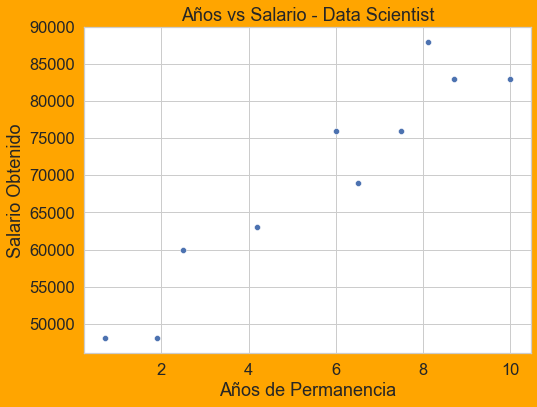

In [88]:
#Graficamos la Data y los ejes
plt.figure(figsize=(8,6),facecolor="Orange")
sns.set(font_scale = 1.5)
sns.set_style("whitegrid")
plt.title("Años vs Salario - Data Scientist")
plt.xlabel("Años de Permanencia")
plt.ylabel("Salario Obtenido")
sns.scatterplot(data=df,x="años",y="salario")

* Tal y como podemos intuir, mientras más uno posea años de experiencia, el salario que le corresponde es mayor.

In [89]:
salary_by_tenure = defaultdict(list)
for salary, tenure in salaries_and_tenures:
 salary_by_tenure[tenure].append(salary)


In [90]:
average_salary_by_tenure = {
 tenure: sum(salaries) / len(salaries)
 for tenure, salaries in salary_by_tenure.items()
}

In [91]:
average_salary_by_tenure

{8.7: 83000.0,
 8.1: 88000.0,
 0.7: 48000.0,
 6: 76000.0,
 6.5: 69000.0,
 7.5: 76000.0,
 2.5: 60000.0,
 10: 83000.0,
 1.9: 48000.0,
 4.2: 63000.0}

* Emplear un intento de promedio es envano dado a que los años de experiencia no parecen coincidir, por lo que no es imposible agrupar a menos que sean de forma independiente.

Lo mejor en nuestro caso sería clasificar!

In [94]:
def tenure_bucket(tenure):
    #Menos de Dos años de Experiencia
    if tenure < 2:
        return "less than two"
    #Menos de 5 años de experiencia
    elif tenure < 5:
        return "between two and five"
    #Que no cumplan niguna de las condiciones + 5
    else:
        return "more than five"

* Clasificamos por Años Trabajados, empleando la función anterior

In [95]:
salary_by_tenure_bucket = defaultdict(list)
for salary, tenure in salaries_and_tenures:
 bucket = tenure_bucket(tenure)
 salary_by_tenure_bucket[bucket].append(salary)


In [100]:
salary_by_tenure_bucket

defaultdict(list,
            {'more than five': [83000, 88000, 76000, 69000, 76000, 83000],
             'less than two': [48000, 48000],
             'between two and five': [60000, 63000]})

* Obtenemos el Promedio

In [98]:
average_salary_by_bucket = {
 tenure_bucket: sum(salaries) / len(salaries)
 for tenure_bucket, salaries in 
 salary_by_tenure_bucket.items()
}

In [99]:
average_salary_by_bucket

{'more than five': 79166.66666666667,
 'less than two': 48000.0,
 'between two and five': 61500.0}

In [101]:
average_salary_by_bucket["more than five"] - average_salary_by_bucket["less than two"]

31166.66666666667

* En Promedio los que poseen mas de 5 años de experiencia ganan un 65% adicional de aquellos con poca o nula experiencia.

In [102]:
31166/average_salary_by_bucket["less than two"]

0.6492916666666667

Algoritmo de Cuentas Pagadas

* Se debe hallar la relación que existe entre los años de experiencia y las Cuentas Pagas

0.7 paid
1.9 unpaid
2.5 paid
4.2 unpaid
6.0 unpaid
6.5 unpaid
7.5 unpaid
8.1 unpaid
8.7 paid
10.0 paid

In [104]:
dicc = dict(anios=[0.7,1.9,2.5,4.2,6.0,6.5,7.5,8.1,8.7,10.0],
estado_pago = ["paid","unpaid","paid","unpaid","unpaid","unpaid","unpaid","unpaid","paid","paid"])

In [107]:
df = pd.DataFrame(dicc)
df

,anios,estado_pago
0,0.7,paid
1,1.9,unpaid
2,2.5,paid
3,4.2,unpaid
4,6.0,unpaid
5,6.5,unpaid
6,7.5,unpaid
7,8.1,unpaid
8,8.7,paid
9,10.0,paid


* Como ejemplo didáctico se halla un patrón el cual nos menciona que usuarios con pocos o muchos años de experiencia suelen tener cuentas pagadas.
* Mientras que con usuarios con experiencia mas cercanos al promedio tienen un tendecia a dejarla sin pagar 

In [108]:
def predict_paid_or_unpaid(years_experience):
    if years_experience < 3.0:
        return "paid"
    elif years_experience < 8.5:
        return "unpaid"
    else:
        return "paid"

In [112]:
print(predict_paid_or_unpaid(1.5))
print(predict_paid_or_unpaid(5.5))
print(predict_paid_or_unpaid(11.5))

paid
unpaid
paid


Algoritmo de Tópicos de Interés

* Cómo podríamos priorizar que Tópico abordar de acuerdo al interés popular?

In [113]:
interests = [
 (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
 (0, "Spark"), (0, "Storm"), (0, "Cassandra"),
 (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
 (1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2,
"scipy"),
 (2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"),
(3, "Python"),
 (3, "statistics"), (3, "regression"), (3, "probability"),
 (4, "machine learning"), (4, "regression"), (4, "decisiontrees"),
 (4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5,
"C++"),
 (5, "Haskell"), (5, "programming languages"), (6,
"statistics"),
 (6, "probability"), (6, "mathematics"), (6, "theory"),
 (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
 (7, "neural networks"), (8, "neural networks"), (8, "deeplearning"),
 (8, "Big Data"), (8, "artificial intelligence"), (9,
"Hadoop"),
 (9, "Java"), (9, "MapReduce"), (9, "Big Data")
]

* La forma más sencilla sería contar las palabras

In [117]:
words_and_counts = Counter(word for user, interest in interests
 for word in interest.lower().split())
words_and_counts

Counter({'hadoop': 2,
         'big': 3,
         'data': 3,
         'hbase': 2,
         'java': 3,
         'spark': 1,
         'storm': 1,
         'cassandra': 2,
         'nosql': 1,
         'mongodb': 1,
         'postgres': 1,
         'python': 3,
         'scikit-learn': 2,
         'scipy': 1,
         'numpy': 1,
         'statsmodels': 1,
         'pandas': 1,
         'r': 2,
         'statistics': 2,
         'regression': 2,
         'probability': 2,
         'machine': 2,
         'learning': 2,
         'decisiontrees': 1,
         'libsvm': 1,
         'c++': 1,
         'haskell': 1,
         'programming': 1,
         'languages': 1,
         'mathematics': 1,
         'theory': 1,
         'mahout': 1,
         'neural': 2,
         'networks': 2,
         'deeplearning': 1,
         'artificial': 1,
         'intelligence': 1,
         'mapreduce': 1})

In [120]:
#Most coomon sirve para encontrar los elementos mas comunes de una lista
for word, count in words_and_counts.most_common():
 if count > 1:
    print(word, count)

big 3
data 3
java 3
python 3
hadoop 2
hbase 2
cassandra 2
scikit-learn 2
r 2
statistics 2
regression 2
probability 2
machine 2
learning 2
neural 2
networks 2
